In [50]:
## CNN == Convolutional neural network

Image processing involves performing operations on images to enhance them, extract features, or prepare them for other applications like computer vision or machine learning.

It can be broken into two types: • Analog Image Processing: Applied to hard copies like photographs.

• Digital Image Processing: Manipulation of images in digital form using computers.

Common goals: • Noise reduction • Image enhancement • Image restoration • Object detection and recognition

In [51]:
# ##ip 
# 1 - medical field 
# 2 - remote sensing 
# 3 - industrial app 
# 4 - security 
# 5 - robo 
# 6 - multimedia 

In [52]:
##pixel -- an image is made up of tiny elements 
# called pixels 
#each pixel represents an intensity value 

In [53]:
## there are 2types of images 
# 1 - gray scale image-- black and white -- 1 channel -- 0-255 
# 2 - color scale -- rgb image --3 channel 

##---bit depth -- define how many difff intensity level a pixel can represent 
# 1 -- 1-bit -- black and white --- 2 level
# 2 ----8- bit --- 256 levels of gray scale image (0 = black , 255 white)
# 3 ---24 bit colour image --- RGB -- 8 bit for each channel -- 256x256x256 

In [54]:
##lib used for ip 
#1 - opencv 
# c++ lib with python bindings 
# efficient for real time cv task 
# pip install opencv-python
#2 - pillow 
# simpler python lib 
# good for basic task 
#pip install pillow

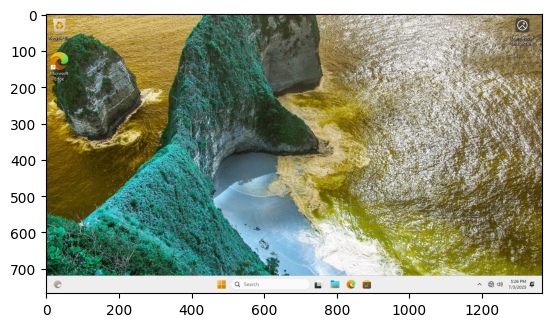

In [55]:
##open cv 
import cv2
import matplotlib.pyplot as plt
img = cv2.imread(r"C:\Users\dell\Pictures\Screenshots\Screenshot (1).png")
plt.imshow(img)
plt.show()
# cv2.imshow("image",img) ## save the image to disk
# cv2.waitKey(0)   ## wait for any key to be pressed
# cv2.destroyAllWindows()  ## close all windows

In [56]:
##pillow 
from PIL import Image
img1 = Image.open(r"C:\Users\dell\Pictures\Screenshots\Screenshot (1).png")
# img.show()
print(img1.size) ## total number of pixel 
print(img.shape)    ##dimension(height,width,channel)
print(img.dtype)    ##data type#

(1366, 768)
(768, 1366, 3)
uint8


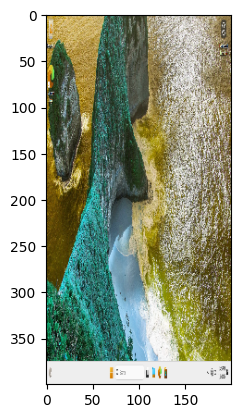

In [57]:
##scaling(resize)-- change the size of an image - either increasing or decreasing
##scaled_img = cv2.resize(img,(width,height))

scaled_img=cv2.resize(img,(200, 400))
# scaled_img = cv2.resize(img , (0, 0), fx=0.5, fy=0.5)
# ##fx and fy == scaling factors 
# ##(0,0) -- original size
# ##height = 200 x 0.5 = 100
plt.imshow(scaled_img)


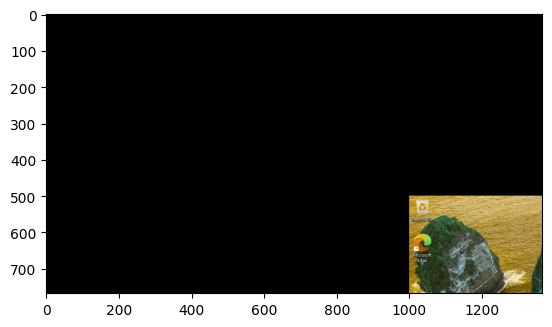

In [58]:
##translation--shift an image vertically or horizontally
import numpy as np 
rows , cols = img.shape[:2]
tx , ty = 1000, 500
##shift right by 1000 and down by 500 
M = np.float32([[1,0,tx],[0,1,ty]])
##[1,0,tx] -- 1 -- keep x -cordinate same 
##0 -- dont mix in thw y - cordinate
##tx - add this amount in x
translated_img = cv2.warpAffine(img,M,(cols,rows))
##wrap affine -- rotation , translation , scaling , shearing
plt.imshow(translated_img)


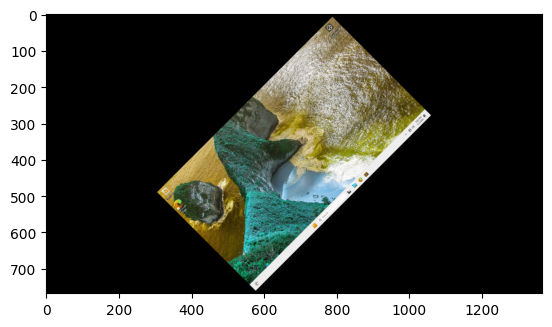

In [59]:
##rotation -- roatate  the image around a center point
center = (cols//2,rows//2)
angle = 45 
scale = 0.5
##zoom in ya zoom out --- 1 == orginal size , <1 == zoom out , >1 == zoom in 
M = cv2.getRotationMatrix2D(center,angle,scale)
rotated_img = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(rotated_img)



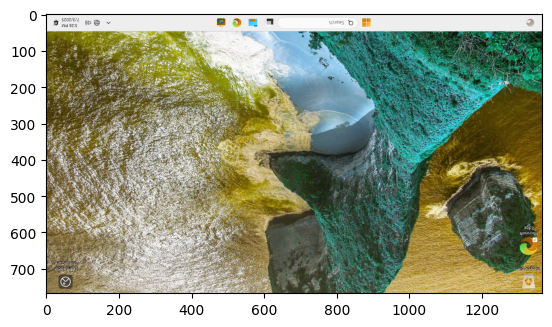

In [60]:
##flipping -- means mirroring the image across an axis 
flipped_img = cv2.flip(img,-1)
##flipcode 
##0 - vertical 
##1 - horizontal 
##-1 -- both 
plt.imshow(flipped_img)

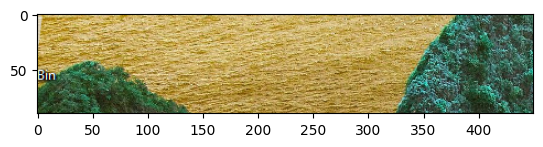

In [61]:
#cropping an image 
##cropping is just slicing an array 
# cropped_img  = image[y1:y2,x1:x2]

cropped = img[10:100, 50:500]
plt.imshow(cropped)

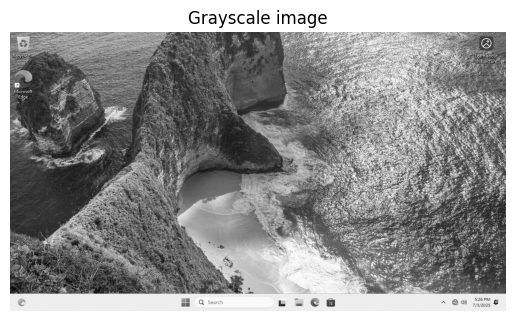

In [62]:
## convert the imge into grayscale image
gray_image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# display the image usiong metplotlib
plt.imshow(gray_image,cmap="gray")
plt.title("Grayscale image")
plt.axis("off")
plt.show()


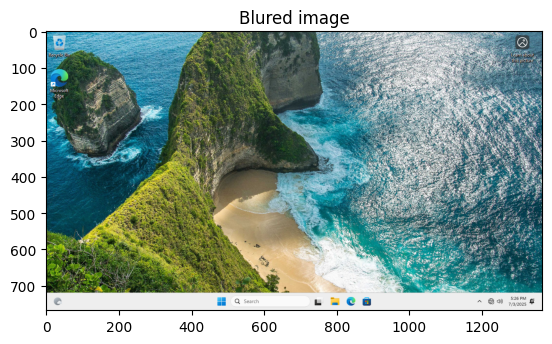

In [63]:
# Apply Gaussian blur
# Kernel size (ksize) must be odd integers. (5, 5) is a common choice.
# sigmaX is the standard deviation in X. 0 means calculated from kernel size.
blurred_image = cv2.GaussianBlur(img, (5, 5), 0)
## convert the image into BGR to RBG 
blurred_image_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(blurred_image_rgb)
plt.title("Blured image")
plt.axis("on")
plt.show()

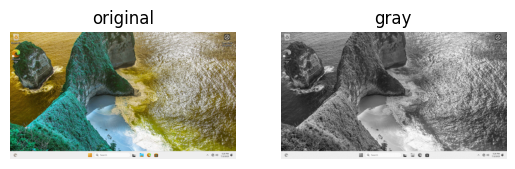

In [64]:
## rgb to grayscale conversion
## gray = 0.299 * R + 0.587 * G + 0.144 *B
## human eye wo read and green colour are more sensiive
img2 = cv2.imread(r"C:\Users\dell\Pictures\Screenshots\Screenshot (1).png")
gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,1)
plt.imshow(img2)
plt.title("original")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(gray, cmap="gray")
plt.title("gray")
plt.axis("off")
plt.show()

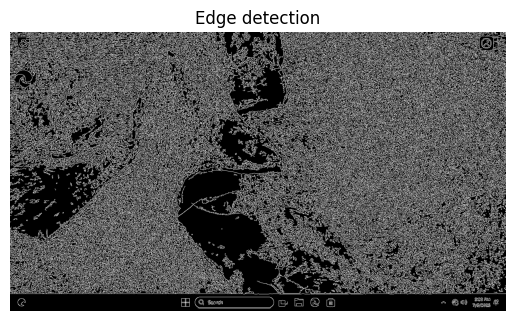

In [65]:
## Edge detecation
# Apply Canny edge detector
# The two arguments after the image are threshold1 and threshold2.
# Any gradient value between threshold1 and threshold2 is considered an edge if it is connected to an edge pixel with a gradient value above threshold2.
edge = cv2.Canny(gray_image,50,150)
## display the image using matplotlib
plt.imshow(edge,cmap="gray")
plt.title("Edge detection")
plt.axis("off")
plt.show()

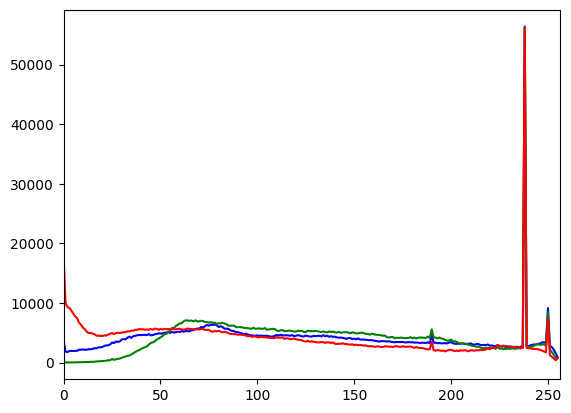

In [66]:
## histogram -- it show numerical data in pericular time period
## it is a graph that represent the distribution of pixel intensity values in an image


import matplotlib.pyplot as plt
img3 = cv2.imread(r"C:\Users\dell\Pictures\Screenshots\Screenshot (1).png")
color = ("b","g","r")
for i ,col in enumerate(color):
    #i -- channel index --0,1,2
    ## none -- mask -- compute the histpgra for the entire emage
    ## 256 -- number of binary/interval
    #0-255 -- range -- range of pixel values
    hist = cv2.calcHist([img3],[i],None,[256],[0,256])
    plt.plot(hist,color=col)
    plt.xlim([0,256])
plt.show()

    


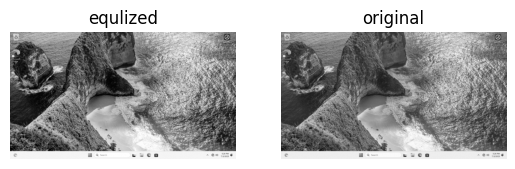

In [67]:
## histogram equalization --
## equalize the histogram of an image
## it is done by mapping the intensity values to uniform distrubution

## it improve image contract by spreding out the most freq intensity values in the image

##note -- image input should be gray scale image
##equilize hist -- cv2.equlizeHist(img)

eq = cv2.equalizeHist(gray)
plt.subplot(1,2,1)
plt.imshow(eq,cmap="gray")
plt.title("equlized")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(gray, cmap="gray")
plt.title("original")
plt.axis("off") ## hide the axis
plt.show()


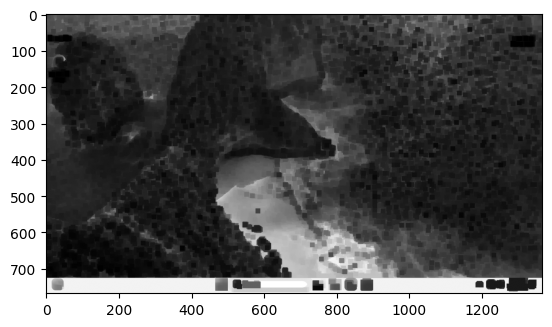

In [68]:
## erosion -- remove white pixels from the boundary of an object
##it makes white region shrink and black expand

## dilation -- opposit of erosion
## it makes black region shrink and white expand

kernal = np.ones((5,5),np.uint8)
## kernal -- image gets modiefied using kernal
eroded = cv2.erode(gray,kernal,iterations=3) ## here we increase and decrease the iteration to chekmthe disfference
plt.imshow(eroded,cmap="gray")
plt.show()




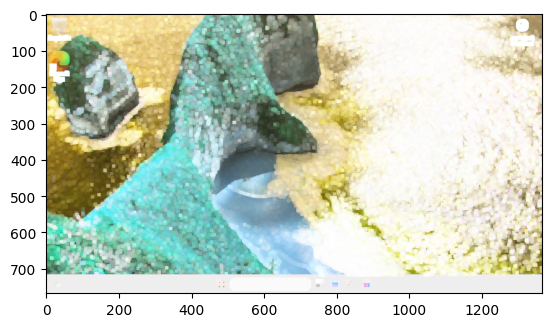

In [69]:
## dilation
dilated = cv2.dilate(img3,kernal,iterations=2)
plt.imshow(dilated,cmap="gray")
plt.show()

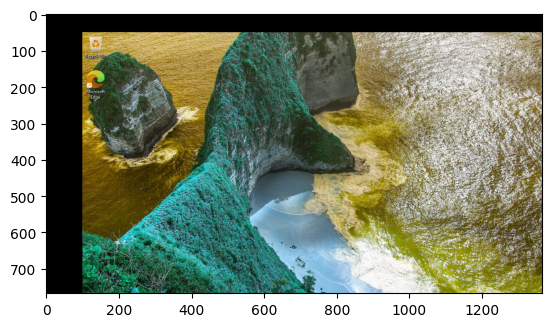

In [70]:
## question -- 
# Translate an image 100 pixels right and 50 pixels down.
# use a translation matrix with cv2.warpAffine()

import cv2
import numpy as np 
import matplotlib.pyplot as plt
img5 = cv2.imread(r"C:\Users\dell\Pictures\Screenshots\Screenshot (1).png")
rows , cols = img5.shape[:2]
tx , ty = 100, 50
M = np.float32([[1,0,tx],[0,1,ty]])

translated_img = cv2.warpAffine(img5,M,(cols,rows))
##wrap affine -- rotation , translation , scaling , shearing
plt.imshow(translated_img)

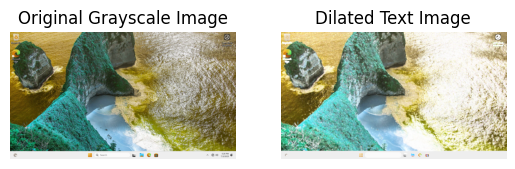

In [71]:
## question --
# Use dilation to restore text thickness in a thin-text image.
#Apply cv2.dilate() and display result

# img = cv2.imread('MadanJII.jpg')
kernel = np.ones((3, 3), np.uint8)

dilated_text_image = cv2.dilate(img, kernel, iterations=2)
# er_image = cv2.erode(img, kernel, iterations=1)


plt.subplot(1, 2, 1)
plt.imshow(img5, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_text_image, cmap='gray')
plt.title('Dilated Text Image')
plt.axis('off')

plt.show()